In [107]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


# Libraries to help with reading and manipulating data

import numpy as np 
import pandas as pd 

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [25]:
back_pain_data = pd.read_csv("../../data/backpain.csv")

<IPython.core.display.Javascript object>

In [26]:
data = back_pain_data.copy()

<IPython.core.display.Javascript object>

In [27]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

In [28]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


<IPython.core.display.Javascript object>

In [29]:
data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

In [30]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]

<IPython.core.display.Javascript object>

In [31]:
replaceStruct = {"Status": {"Abnormal": 1, "Normal": 0 } }
data=data.replace(replaceStruct)

<IPython.core.display.Javascript object>

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 31.5 KB


<IPython.core.display.Javascript object>

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


<IPython.core.display.Javascript object>

In [34]:
data.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


<IPython.core.display.Javascript object>

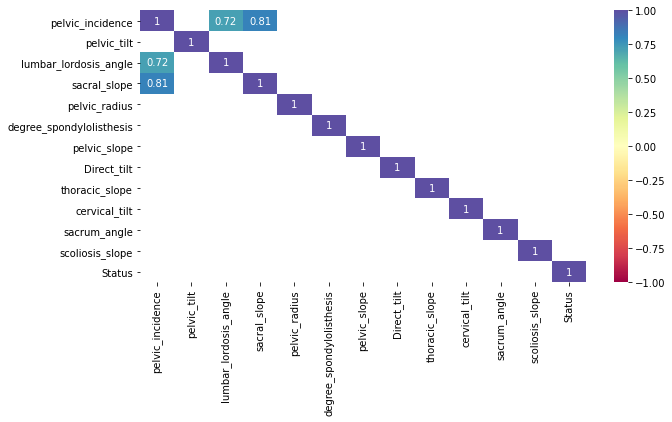

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()[data.corr()>=0.7],annot=True,vmax=1,vmin=-1,cmap='Spectral');

In [36]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

In [37]:
data['Status'].value_counts()

1    210
0    100
Name: Status, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
n_true = len(data.loc[data['Status'] == 1])
n_false = len(data.loc[data['Status'] == 0])
print("Number of AbNormal : {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Normal : {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of AbNormal : 210 (67.74%)
Number of Normal : 100 (32.26%)


<IPython.core.display.Javascript object>

In [73]:
X = data.drop(['Status'], axis=1)
Y = data['Status']

<IPython.core.display.Javascript object>

In [89]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

<IPython.core.display.Javascript object>

In [90]:

# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(X_train)
# adding constant to the test data
x_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.868
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           4.09e-15
Time:                        16:40:45   Log-Likelihood:                -95.547
No. Observations:                 217   AIC:                             217.1
Df Residuals:                     204   BIC:                             261.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

In [77]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = sm.add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

<IPython.core.display.Javascript object>

In [78]:
num_feature_set

,const,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,1.0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,1.0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,1.0,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,1.0,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,1.0,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1.0,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,1.0,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,1.0,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,1.0,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


<IPython.core.display.Javascript object>

In [79]:
# Calculating VIF
vif_series = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

const                       189.852633
pelvic_incidence                   inf
pelvic_tilt                        inf
lumbar_lordosis_angle         2.200831
sacral_slope                       inf
pelvic_radius                 1.215893
degree_spondylolisthesis      1.791816
pelvic_slope                  1.026159
Direct_tilt                   1.029905
thoracic_slope                1.017879
cervical_tilt                 1.036604
sacrum_angle                  1.016849
scoliosis_slope               1.032994
dtype: float64



<IPython.core.display.Javascript object>

In [80]:
# Dropping first variable with high VIF
num_feature_set1 = num_feature_set.drop(['pelvic_incidence'],axis=1) 
# Checking VIF value
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set1.values,i) for i in range(num_feature_set1.shape[1])],index=num_feature_set1.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       189.812795
pelvic_tilt                   1.504198
lumbar_lordosis_angle         2.192965
sacral_slope                  2.380210
pelvic_radius                 1.215346
degree_spondylolisthesis      1.790349
pelvic_slope                  1.026155
Direct_tilt                   1.029665
thoracic_slope                1.013925
cervical_tilt                 1.036604
sacrum_angle                  1.013586
scoliosis_slope               1.019037
dtype: float64



<IPython.core.display.Javascript object>

In [83]:
# Dropping second variable with high VIF
num_feature_set2 = num_feature_set.drop(['pelvic_tilt'],axis=1)
# Checking VIF value
vif_series2 = pd.Series([variance_inflation_factor(num_feature_set2.values,i) for i in range(num_feature_set2.shape[1])],index=num_feature_set2.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                       189.812795
pelvic_incidence              4.461502
lumbar_lordosis_angle         2.192965
sacral_slope                  3.238992
pelvic_radius                 1.215346
degree_spondylolisthesis      1.790349
pelvic_slope                  1.026155
Direct_tilt                   1.029665
thoracic_slope                1.013925
cervical_tilt                 1.036604
sacrum_angle                  1.013586
scoliosis_slope               1.019037
dtype: float64



<IPython.core.display.Javascript object>

In [85]:
# Dropping the third variable with high VIF
num_feature_set3 = num_feature_set.drop(['sacral_slope'],axis=1) 
# Checking VIF value
vif_series3 = pd.Series([variance_inflation_factor(num_feature_set3.values,i) for i in range(num_feature_set3.shape[1])],index=num_feature_set3.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                       189.812795
pelvic_incidence              3.924720
pelvic_tilt                   1.800642
lumbar_lordosis_angle         2.192965
pelvic_radius                 1.215346
degree_spondylolisthesis      1.790349
pelvic_slope                  1.026155
Direct_tilt                   1.029665
thoracic_slope                1.013925
cervical_tilt                 1.036604
sacrum_angle                  1.013586
scoliosis_slope               1.019037
dtype: float64



<IPython.core.display.Javascript object>

In [91]:
# Dropping sacral slope
X_train, X_test, y_train, y_test = train_test_split(num_feature_set3, Y, test_size=0.30, random_state = 1)


<IPython.core.display.Javascript object>

In [93]:
# Iteratively dropping variables with a high p-value
X_train2 = X_train.drop(['pelvic_slope'],axis=1)
X_test2 = X_test.drop(['pelvic_slope'],axis=1)
logit = sm.Logit(y_train, X_train2.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.292533
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5419
Time:                        16:45:52   Log-Likelihood:                -63.480
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 3.386e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.7184      4.843      4.485      0.000      12.226

<IPython.core.display.Javascript object>

In [95]:
X_train3 = X_train2.drop(['scoliosis_slope'],axis=1)
X_test3 = X_test2.drop(['scoliosis_slope'],axis=1)
logit = sm.Logit(y_train, X_train3.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.292830
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            9
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5415
Time:                        16:46:12   Log-Likelihood:                -63.544
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 8.514e-28
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.6340      4.853      4.458      0.000      12.122

<IPython.core.display.Javascript object>

In [99]:
X_train4 = X_train3.drop(['cervical_tilt'],axis=1)
X_test4 = X_test3.drop(['cervical_tilt'],axis=1)
logit = sm.Logit(y_train, X_train4.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.293124
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5410
Time:                        16:46:52   Log-Likelihood:                -63.608
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 2.012e-28
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.2065      4.704      4.508      0.000      11.987

<IPython.core.display.Javascript object>

In [100]:
X_train6 = X_train5.drop(['lumbar_lordosis_angle'],axis=1)
X_test6 = X_test5.drop(['lumbar_lordosis_angle'],axis=1)
logit = sm.Logit(y_train, X_train6.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.294074
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5395
Time:                        16:46:56   Log-Likelihood:                -63.814
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 9.708e-30
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.5764      4.663      4.627      0.000      12.437

<IPython.core.display.Javascript object>

In [101]:
X_train5 = X_train4.drop(['Direct_tilt'],axis=1)
X_test5 = X_test4.drop(['Direct_tilt'],axis=1)
logit = sm.Logit(y_train, X_train5.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.293351
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5407
Time:                        16:47:03   Log-Likelihood:                -63.657
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 4.370e-29
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.2637      4.712      4.513      0.000      12.028

<IPython.core.display.Javascript object>

In [103]:
X_train7 = X_train6.drop(['sacrum_angle'],axis=1)
X_test7 = X_test6.drop(['sacrum_angle'],axis=1)
logit = sm.Logit(y_train, X_train7.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.294900
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5382
Time:                        16:47:15   Log-Likelihood:                -63.993
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 2.000e-30
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.3015      4.609      4.622      0.000      12.268

<IPython.core.display.Javascript object>

In [104]:
X_train8 = X_train7.drop(['thoracic_slope'],axis=1)
X_test8 = X_test7.drop(['thoracic_slope'],axis=1)
logit = sm.Logit(y_train, X_train8.astype(float))
lg = logit.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.298431
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            4
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.5327
Time:                        16:47:27   Log-Likelihood:                -64.760
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 6.512e-31
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       19.8000      4.286      4.619      0.000      11.399

<IPython.core.display.Javascript object>

In [108]:
score_DT = []
for i in range(1,9):
 dTree = DecisionTreeClassifier(max_depth=i,criterion = 'gini', random_state=1)
 dTree.fit(X_train, y_train)
 pred = dTree.predict(X_train)
 case = {'Depth':i,'Recall':recall_score(y_train,pred)}
 score_DT.append(case)

<IPython.core.display.Javascript object>

In [120]:
print(score_DT)


[{'Depth': 1, 'Recall': 0.6875}, {'Depth': 2, 'Recall': 0.8888888888888888}, {'Depth': 3, 'Recall': 0.8402777777777778}, {'Depth': 4, 'Recall': 0.9236111111111112}, {'Depth': 5, 'Recall': 0.9583333333333334}, {'Depth': 6, 'Recall': 0.9722222222222222}, {'Depth': 7, 'Recall': 0.9722222222222222}, {'Depth': 8, 'Recall': 0.9930555555555556}]


<IPython.core.display.Javascript object>

In [136]:
feature_names = list(X_train.columns)
print(feature_names)

['const', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


<IPython.core.display.Javascript object>

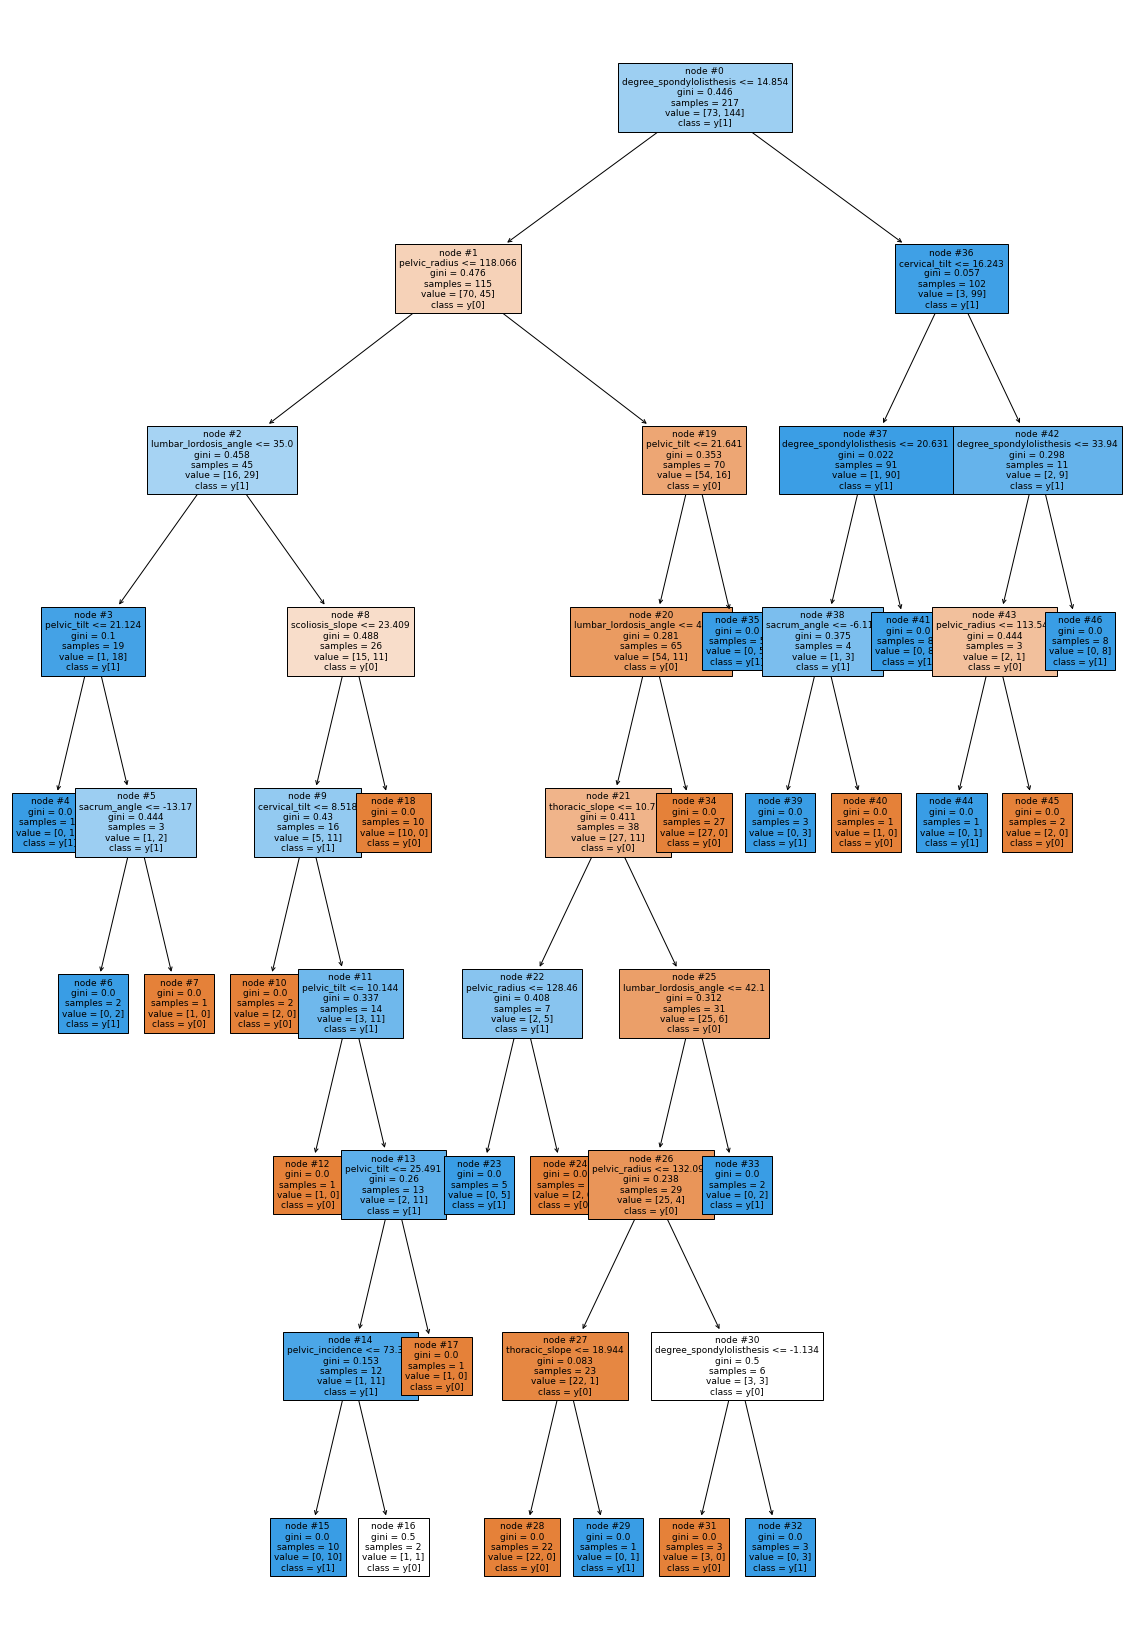

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [139]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
degree_spondylolisthesis  0.434856
pelvic_radius             0.163203
lumbar_lordosis_angle     0.119533
pelvic_tilt               0.102739
scoliosis_slope           0.060670
thoracic_slope            0.052251
sacrum_angle              0.029549
cervical_tilt             0.028508
pelvic_incidence          0.008691
const                     0.000000
pelvic_slope              0.000000
Direct_tilt               0.000000


<IPython.core.display.Javascript object>

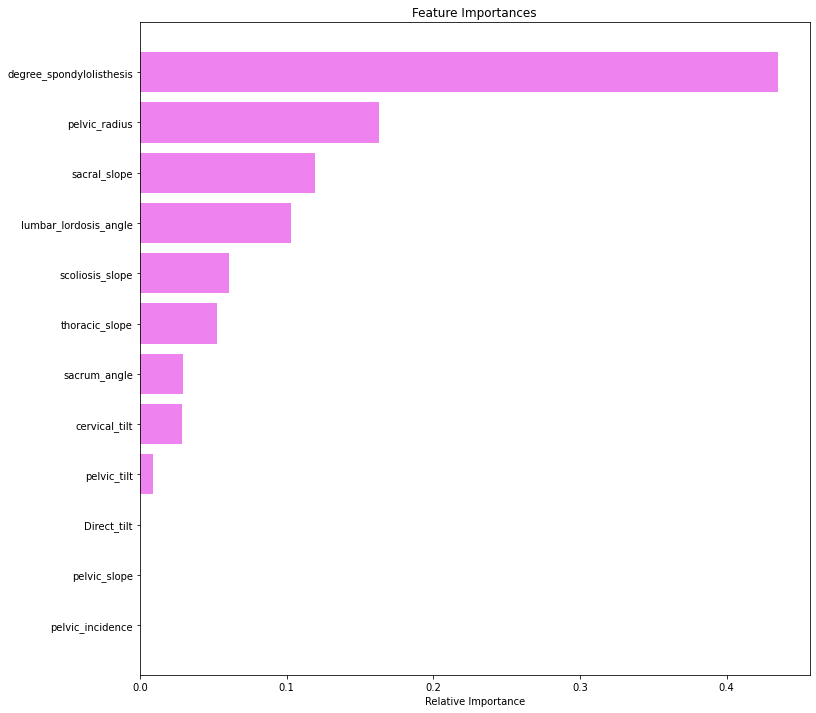

<IPython.core.display.Javascript object>

In [129]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15,None], 
 'criterion' : ['gini','entropy'],
 'splitter' : ['best','random']
 }

recall = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters,scoring=recall,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

<IPython.core.display.Javascript object>

In [151]:
# Training decision tree with default parameters
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
# Tuned model
estimator.fit(X_train, y_train)

# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)

# Checking model performance of Decision Tree with default parameters
print("recall_score_default" , recall_score(y_test,y_pred_test1))
print("f1_score_default", metrics.f1_score(y_test,y_pred_test1))

# Checking model performance of tunedDecision Tree
print("recall_score_tuned" , recall_score(y_test,y_pred_test2))
print("f1_score_tuned" , metrics.f1_score(y_test,y_pred_test2))

recall_score_default 0.7878787878787878
f1_score_default 0.8253968253968254
recall_score_tuned 0.803030303030303
f1_score_tuned 0.8346456692913385


<IPython.core.display.Javascript object>